In [1]:
from __future__ import division

import sys
import os
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
plotly.tools.set_credentials_file(username='raunakm90', api_key='qh9wd16d6g')

from pymongo import MongoClient

%matplotlib inline

In [2]:
sys.path.insert(0, 'D:\Yelp\Analysis')
import eda_business

In [3]:
business_df = eda_business.getMongoDB_query_business()
#business_df.head()

In [4]:
print (business_df.info())
print (business_df.dtypes)
print (business_df.stars.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5695 entries, 0 to 5694
Data columns (total 16 columns):
_id              5695 non-null object
attributes       5695 non-null object
business_id      5695 non-null object
categories       5695 non-null object
city             5695 non-null object
full_address     5695 non-null object
hours            5695 non-null object
latitude         5695 non-null float64
longitude        5695 non-null float64
name             5695 non-null object
neighborhoods    5695 non-null object
open             5695 non-null bool
review_count     5695 non-null int64
stars            5695 non-null float64
state            5695 non-null object
type             5695 non-null object
dtypes: bool(1), float64(3), int64(1), object(11)
memory usage: 673.0+ KB
None
_id               object
attributes        object
business_id       object
categories        object
city              object
full_address      object
hours             object
latitude         float64
longit

In [ ]:
#stars_df.stars = stars_df.stars.astype('category')
sns.set(font_scale = 2)
sns.set_context({"figure.figsize": (24, 10)})
sns.set_style("whitegrid")
ax = sns.boxplot(business_df.stars.astype(float))
plt.title("Average Rating Distribution for Charlotte businesses")
plt.xlabel('Stars - Rating')
ax.axes.grid('off')

In [ ]:
#stars_df.stars = stars_df.stars.astype('category')
sns.set(font_scale = 2)
sns.set_context({"figure.figsize": (24, 10)})
sns.set_style("whitegrid")
ax = sns.stripplot(x = 'stars',y = 'review_count',data = business_df,linewidth = 1,size = 10)
#ax = sns.boxplot(x = 'stars', y = 'review_count',data = business_df)
plt.title("Rating by review count")
plt.xlabel('Stars - Rating')
plt.ylabel('Review Count')
ax.axes.grid('off')

In [142]:
#Get the price range attribute for each of the restaurant
business_df['Price_Range'] = eda_business.select_attribute(df = business_df, col = 'attributes',attr_key = 'Price Range')
print (business_df.Price_Range.unique())
business_df.Price_Range.isnull().sum()/len(business_df.Price_Range)*100

[ nan   2.   1.   3.   4.]


30.184372256365233

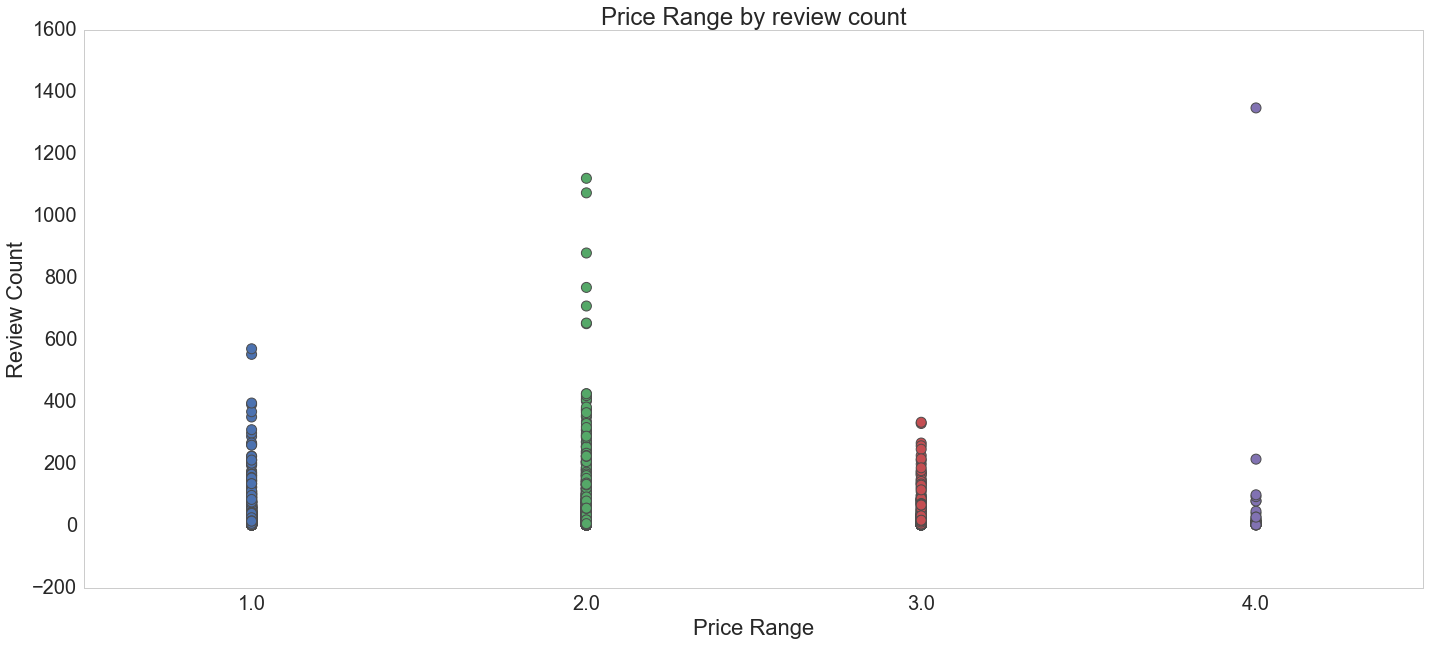

In [153]:
sns.set(font_scale = 2)
sns.set_context({"figure.figsize": (24, 10)})
sns.set_style("whitegrid")
ax = sns.stripplot(x = 'Price_Range',y = 'review_count',data = business_df,linewidth = 1,size = 10)
#ax = sns.boxplot(x = 'Price_Range', y = 'review_count',data = business_df)
plt.title("Price Range by review count")
plt.xlabel('Price Range')
plt.ylabel('Review Count')
ax.axes.grid('off')

In [151]:
food_business = pd.DataFrame()
food_categories = ['Food','Restaurants','Nightlife']
for index,row in business_df.iterrows():
    if any(category in row.categories for category in food_categories):
        food_business = food_business.append(row,ignore_index=True)
food_business.head()

,Price_Range,_id,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,1.0,57ceeb234d6e0109f0793780,"{u'Wheelchair Accessible': True, u'Take-out': ...",Gw5POFxBRoJxN_ZYhk6lgQ,"[Food, Sandwiches, Bagels, Breakfast & Brunch,...",Charlotte,8706 Pineville-Matthews Road\nSuite 100\nCharl...,"{u'Monday': {u'close': u'16:00', u'open': u'05...",35.089035,-80.867055,Bruegger's Bagels,[],1.0,17.0,4.0,NC,business
1,2.0,57ceeb234d6e0109f079378d,"{u'Delivery': True, u'Take-out': True, u'Price...",MMgjU4K0D9RLsb7BWEic4g,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Charlotte,"8510 Park Rd\nCharlotte, NC 28210","{u'Monday': {u'close': u'00:00', u'open': u'10...",35.117183,-80.857545,Domino's Pizza,[],1.0,8.0,3.0,NC,business
2,1.0,57ceeb234d6e0109f07937ac,"{u'Wheelchair Accessible': True, u'Take-out': ...",LT0AgHTpDifuHSXgyLmJwg,"[American (Traditional), Hot Dogs, Breakfast &...",Charlotte,"309 W 4th St\nCharlotte, NC 28202","{u'Monday': {u'close': u'15:00', u'open': u'07...",35.228193,-80.846592,Green's Lunch,[],1.0,44.0,3.5,NC,business
3,2.0,57ceeb234d6e0109f07937ae,"{u'Parking': {u'garage': True, u'street': Fals...",5j704vZBOmW88yJLhnCOEA,"[Food, Coffee & Tea]",Charlotte,"401 S Tryon St\nUptown\nCharlotte, NC 28202",{},35.224616,-80.846425,Jackson's Java,[Uptown],1.0,14.0,3.5,NC,business
4,4.0,57ceeb234d6e0109f07937b1,"{u'Take-out': False, u'Wi-Fi': u'no', u'Good F...",USdRzNk14UdjZWFgBJb0wA,"[American (New), Southern, French, Restaurants]",Charlotte,"511 N Church St\nFourth Ward\nCharlotte, NC 28202","{u'Tuesday': {u'close': u'23:30', u'open': u'0...",35.231679,-80.839625,McNinch House Restaurant,[Fourth Ward],1.0,40.0,4.0,NC,business


ok


_id                                       57ceeb404d6e0109f07a8393
attributes                                                      {}
business_id                                 DH2Ujt_hwcMBIz8VvCb0Lg
categories                                  [Mexican, Restaurants]
city                                                     Charlotte
full_address     Charlotte Douglas International Airport Termin...
hours                                                           {}
latitude                                                   35.2242
longitude                                                 -80.9403
name                                           Salsarita's Express
neighborhoods                                                   []
open                                                          True
review_count                                                    57
stars                                                          2.5
state                                                         

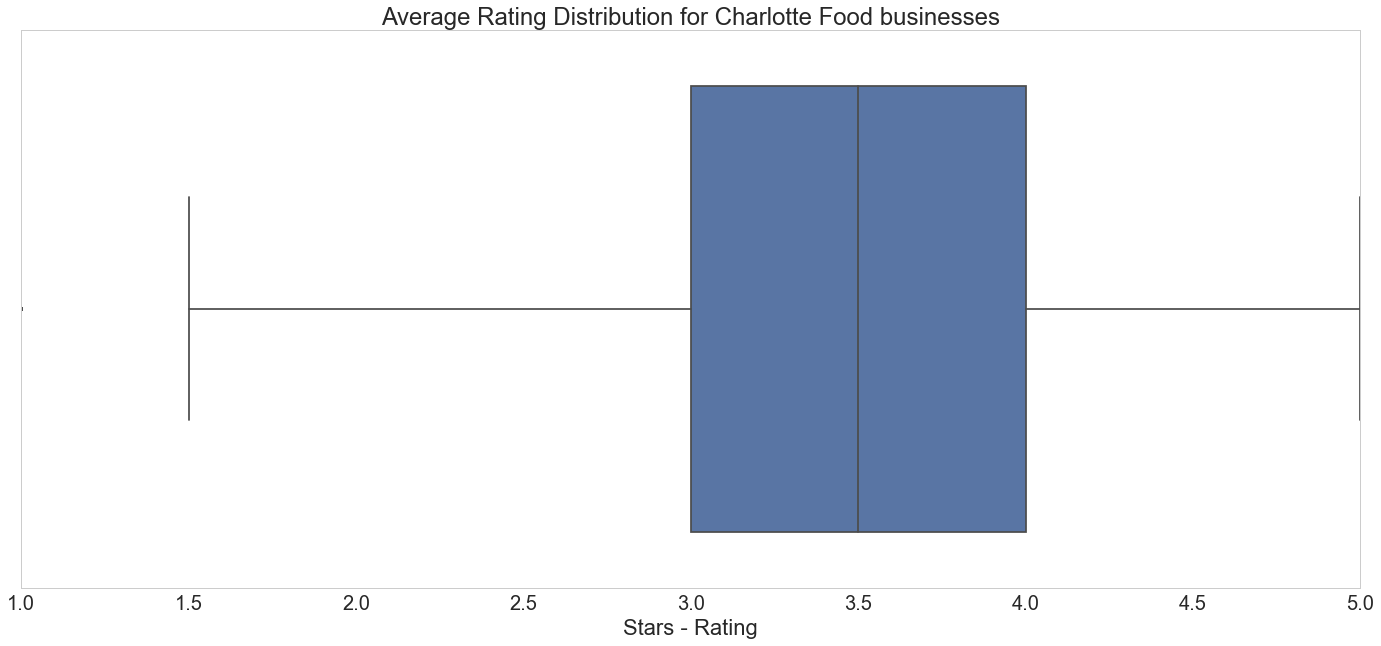

In [152]:
sns.set(font_scale = 2)
sns.set_context({"figure.figsize": (24, 10)})
sns.set_style("whitegrid")
ax = sns.boxplot(food_business.stars.astype(float))
plt.title("Average Rating Distribution for Charlotte Food businesses")
plt.xlabel('Stars - Rating')
ax.axes.grid('off')

In [129]:
# Get Reviews for businesses in Charlotte
business_id = food_business.business_id.tolist()
food_review = eda_business.getMongoDB_query_review(business_id)
food_review.head()

,_id,business_id,date,review_id,stars,text,type,user_id,votes
0,57ceec304d6e0109f07bb69a,KJx7nLuptheVFOktp-wvfg,2014-12-28,8bevX5laoNF9rMR6f99S2A,5,"Within this past year, I added on to my home a...",review,LP0bl3GKToABt3lnpSvA2w,"{u'funny': 0, u'useful': 1, u'cool': 0}"
1,57ceec304d6e0109f07bb69b,KJx7nLuptheVFOktp-wvfg,2015-06-12,t_GU23Lekq_SXHzhiHd_fA,5,"Great prices, great job and the look was perfe...",review,6g1dmd1c8aJrwZu8083jww,"{u'funny': 0, u'useful': 1, u'cool': 0}"
2,57ceec304d6e0109f07bb69c,KJx7nLuptheVFOktp-wvfg,2015-07-01,TYbFu-nwoulKjHdRgVaL4w,5,An excellent experience from start to finish. ...,review,7qzbjxc0dIpuUrpRwlkslw,"{u'funny': 0, u'useful': 0, u'cool': 0}"
3,57ceec304d6e0109f07bb69d,KJx7nLuptheVFOktp-wvfg,2015-09-01,W6oozSUeW5aD4ArRrb_htA,1,"Budget blinds were referred to us, which is wh...",review,CuNVMtMhceDCxo8o5nvdrQ,"{u'funny': 0, u'useful': 0, u'cool': 0}"
4,57ceec304d6e0109f07bb69e,KJx7nLuptheVFOktp-wvfg,2016-06-02,QcYoyr4hMAlSew0NYk6V_Q,5,I love working with this family run business. ...,review,e423WWvphOrBRvdurnev1A,"{u'funny': 0, u'useful': 0, u'cool': 0}"


In [130]:
print (food_review.info())
print (food_review.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19766 entries, 0 to 19765
Data columns (total 9 columns):
_id            19766 non-null object
business_id    19766 non-null object
date           19766 non-null object
review_id      19766 non-null object
stars          19766 non-null int64
text           19766 non-null object
type           19766 non-null object
user_id        19766 non-null object
votes          19766 non-null object
dtypes: int64(1), object(8)
memory usage: 1.4+ MB
None
_id            object
business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
votes          object
dtype: object


In [159]:
#source - https://github.com/amueller/word_cloud
from PIL import Image
from os import path
from nltk.corpus import stopwords
from scipy.misc import imread
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS

limit = 2000
infosize = 16

title = 'Most frequent words in review for Food Business'
chartinfo = 'Food Business'
footer = 'The {} most frequent words, excluding English stopwords.\n{}'.format(limit, chartinfo)
#font = '/usr/share/fonts/truetype/ubuntu-font-family/Ubuntu-B.ttf'
fontcolor='#111111'
bgcolor = '#000000'
stopwords = set(STOPWORDS)
stopwords.add('place')
english_stopwords = stopwords | ENGLISH_STOP_WORDS

In [160]:
review_text = food_review[food_review['stars'] == 5].text
type(review_text)
review_text = " ".join(unicode(i) for i in review_text if not i.isdigit() and  len(i)>5)

In [161]:
d = os.getcwd()
yelp_mask = np.array(Image.open(path.join(d, "49072-yelp-logo-icon-vector-icon-vector-eps.png")))
wordcloud = WordCloud(
    max_words=limit,
    stopwords=english_stopwords,
    background_color = "white",
).generate(review_text)

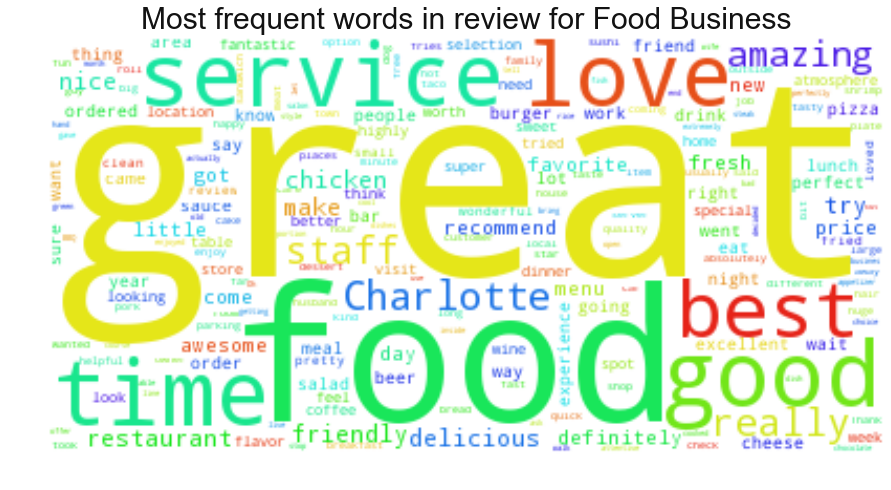

In [162]:
def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(20)

plt.imshow(wordcloud.recolor(random_state=3))
plt.title(title, color=fontcolor, size=30, y=1.01)
plt.axis('off')
plt.show()

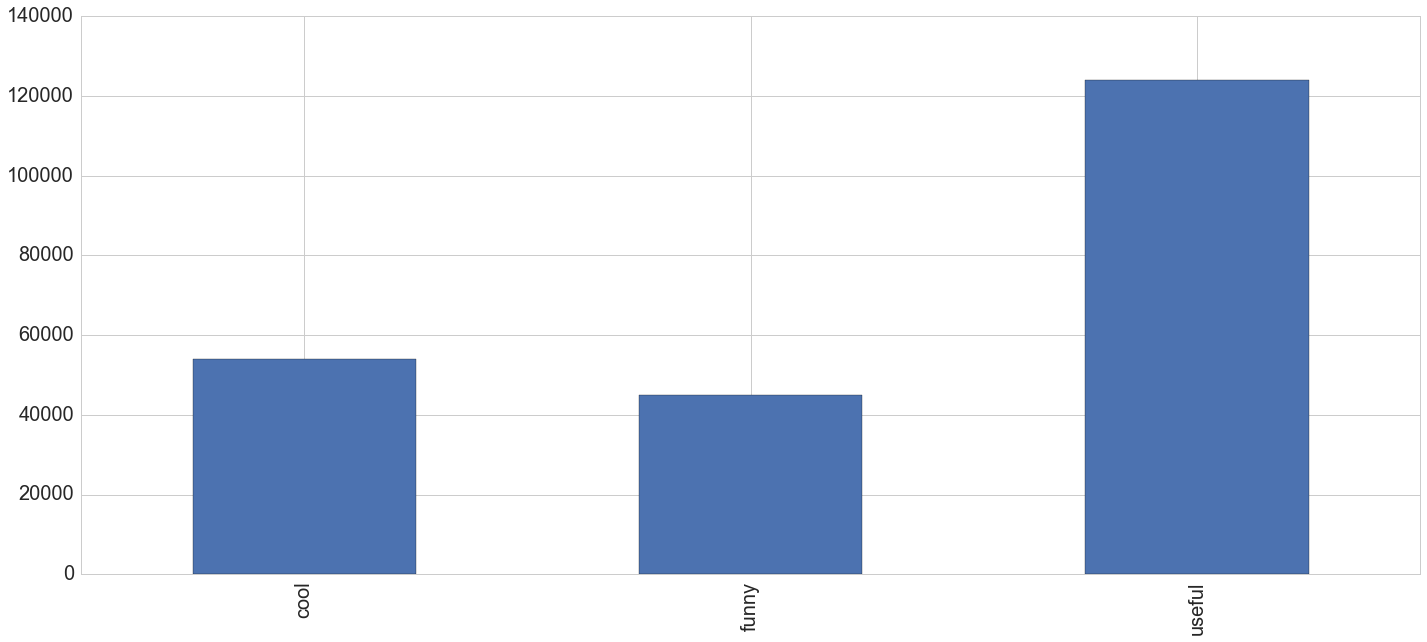

In [135]:
review_votes = pd.DataFrame()
for item in food_review.votes.tolist():
    review_votes = review_votes.append(item,ignore_index=True)
review_votes = review_votes.sum().plot(kind = 'bar')